In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import chardet
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [3]:
data=np.loadtxt('praktikum001_fort.22.lis',skiprows=9)
data1=np.loadtxt('praktikum001_fort.21.lis',skiprows=9)

In [4]:
def pool_forward(A_prev, f=3,stride=1, mode = "average"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    ( n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros(( n_H, n_W, n_C))              
    a_prev_slice = A_prev
    for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
        vert_start = stride * h 
        vert_end = vert_start + f
        for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
            horiz_start = stride * w
            horiz_end = horiz_start + f
                
            for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                a_slice_prev = a_prev_slice[vert_start:vert_end,horiz_start:horiz_end,c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                if mode == "max":
                    A[ h, w, c] = np.max(a_slice_prev)
                elif mode == "average":
                    A[ h, w, c] = np.mean(a_slice_prev)
                elif mode=="sum":
                    A[h,w,c]=np.sum(a_slice_prev)    
    # YOUR CODE ENDS HERE
    
    # Store the input and hparameters in "cache" for pool_backward()
    
    # Making sure your output shape is correct
    assert(A.shape == (n_H, n_W, n_C))
    
    return A

In [5]:
ll=pool_forward(data.reshape((110,110,1000))[27:83,27:83,200:], f=10, mode = "average")
l=pool_forward(data.reshape((110,110,1000))[:,:,200:], f=10, mode = "average")
h=pool_forward(data.reshape((110,110,1000))[:,:,200:], f=110, mode = "average")

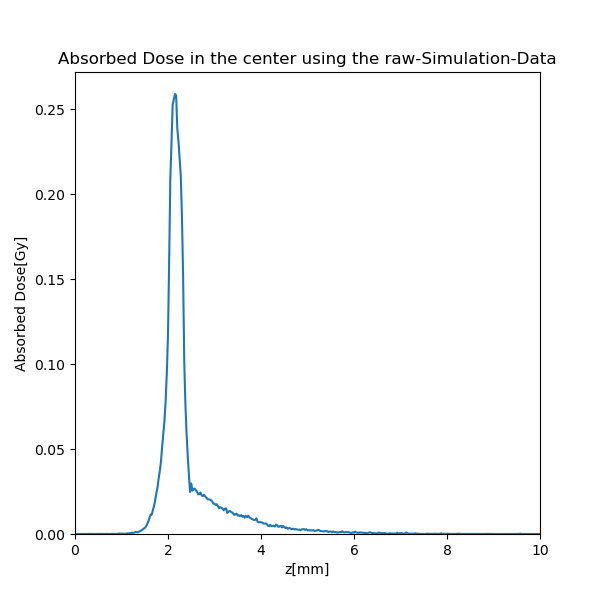

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
xx=np.linspace(0,2-0.0025,800)
plt.plot(xx[:400]*10,data.reshape((110,110,1000))[54,54,100:500]*40000000*1.60218e-7)
plt.title('Absorbed Dose in the center using the raw-Simulation-Data')
plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.xlim(0,10)
plt.ylim(0,None)
plt.show()

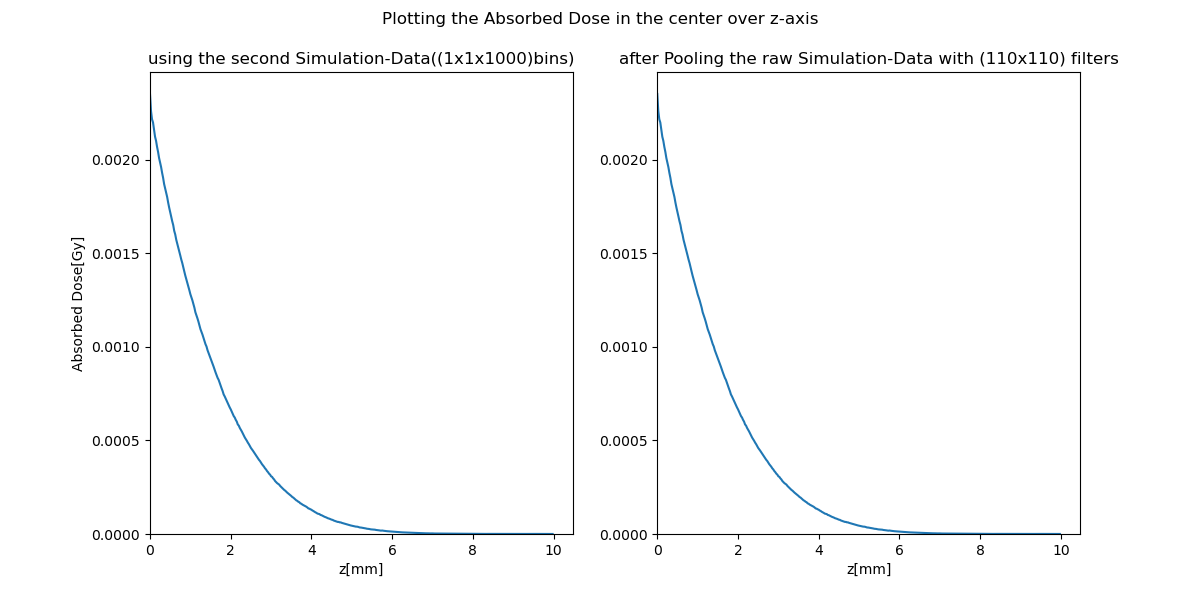

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Plotting the Absorbed Dose in the center over z-axis')
xx=np.linspace(0,2-0.0025,800)
ax[0].plot(xx[:400]*10,data1.flatten()[200:600]*40000000*1.60218e-7)
ax[0].set_title('using the second Simulation-Data((1x1x1000)bins)')
ax[0].axis(xmin=0,xmax=None)
ax[0].axis(ymin=0,ymax=None)
ax[0].set(xlabel='z[mm]', ylabel='Absorbed Dose[Gy]')

ax[1].plot(xx[:400]*10,h.flatten()[:400]*40000000*1.60218e-7)
ax[1].set_title('after Pooling the raw Simulation-Data with (110x110) filters')
ax[1].axis(xmin=0,xmax=None)
ax[1].axis(ymin=0,ymax=None)
ax[1].set(xlabel='z[mm]')
plt.show()

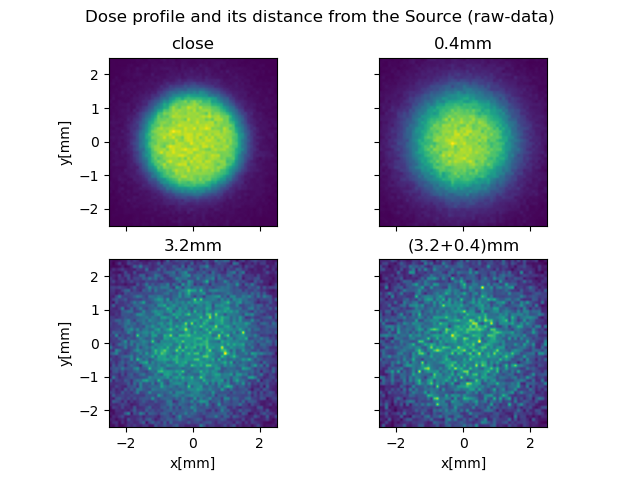

In [8]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Dose profile and its distance from the Source (raw-data)')
axs[0, 0].imshow(data.reshape((110,110,1000))[27:83,27:83,200],extent=[-2.5, 2.5, -2.5, 2.5])
axs[0, 0].set_title('close')

axs[0, 1].imshow(data.reshape((110,110,1000))[27:83,27:83,216],extent=[-2.5, 2.5, -2.5, 2.5])
axs[0, 1].set_title('0.4mm')

axs[1, 0].imshow(data.reshape((110,110,1000))[27:83,27:83,328],extent=[-2.5, 2.5, -2.5, 2.5])
axs[1, 0].set_title('3.2mm')

axs[1, 1].imshow(data.reshape((110,110,1000))[27:83,27:83,328+16],extent=[-2.5, 2.5, -2.5, 2.5])
axs[1, 1].set_title('(3.2+0.4)mm')

for ax in axs.flat:
    ax.set(xlabel='x[mm]', ylabel='y[mm]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

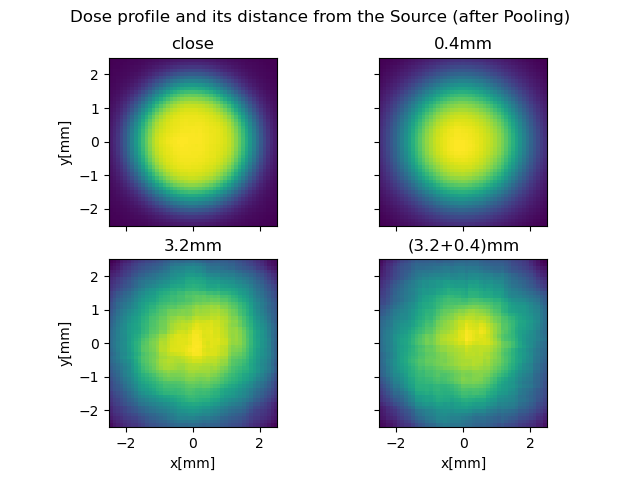

In [9]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Dose profile and its distance from the Source (after Pooling)')
axs[0, 0].imshow(ll[:,:,0],extent=[-2.5, 2.5, -2.5, 2.5])
axs[0, 0].set_title('close')

axs[0, 1].imshow(ll[:,:,16],extent=[-2.5, 2.5, -2.5, 2.5])
axs[0, 1].set_title('0.4mm')

axs[1, 0].imshow(ll[:,:,128],extent=[-2.5, 2.5, -2.5, 2.5])
axs[1, 0].set_title('3.2mm')

axs[1, 1].imshow(ll[:,:,128+16],extent=[-2.5, 2.5, -2.5, 2.5])
axs[1, 1].set_title('(3.2+0.4)mm')

for ax in axs.flat:
    ax.set(xlabel='x[mm]', ylabel='y[mm]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

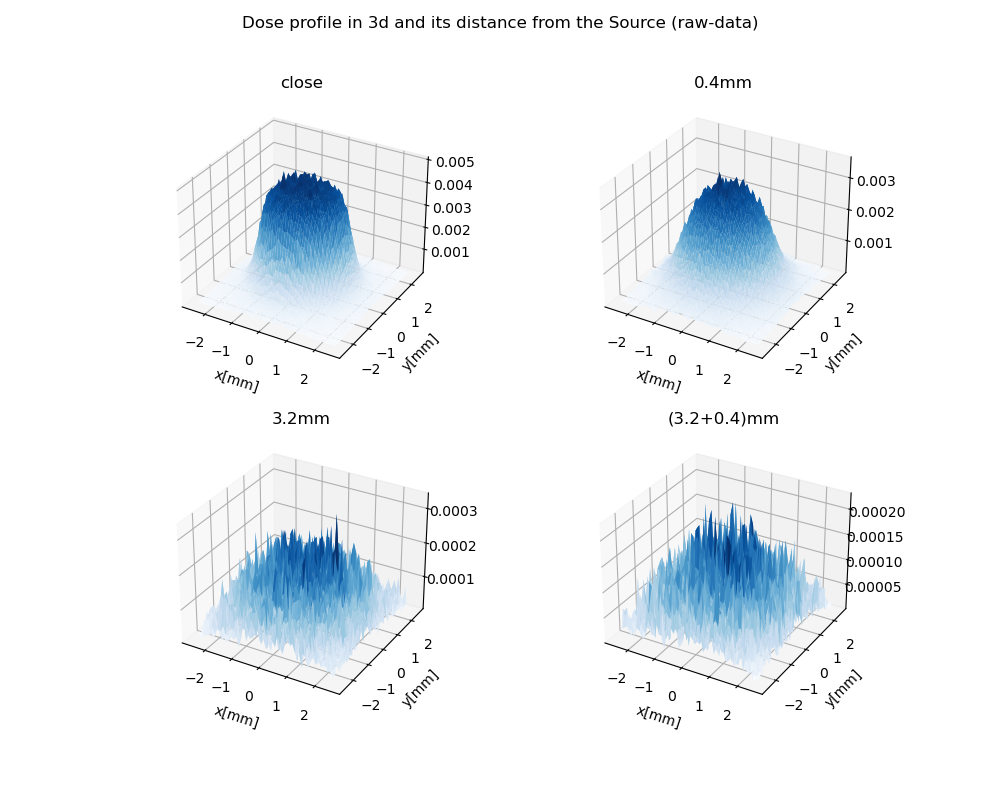

In [10]:
fig, axs = plt.subplots(2, 2,figsize=(10,8),subplot_kw=dict(projection='3d'))
fig.suptitle('Dose profile in 3d and its distance from the Source (raw-data)')
x= np.linspace(-2.5,2.5,56)
xx,yy=np.meshgrid(x,x)
axs[0, 0].plot_surface(xx, yy, data.reshape((110,110,1000))[27:83,27:83,200] ,rstride=1, cstride=1, cmap=cm.Blues)
axs[0, 0].set_title('close')

axs[0, 1].plot_surface(xx, yy, data.reshape((110,110,1000))[27:83,27:83,216] ,rstride=1, cstride=1, cmap=cm.Blues)
axs[0, 1].set_title('0.4mm')

axs[1, 0].plot_surface(xx, yy, data.reshape((110,110,1000))[27:83,27:83,328] ,rstride=1, cstride=1, cmap=cm.Blues)
axs[1, 0].set_title('3.2mm')

axs[1, 1].plot_surface(xx, yy, data.reshape((110,110,1000))[27:83,27:83,328+16] ,rstride=1, cstride=1, cmap=cm.Blues)
axs[1, 1].set_title('(3.2+0.4)mm')

for ax in axs.flat:
    ax.set(xlabel='x[mm]', ylabel='y[mm]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

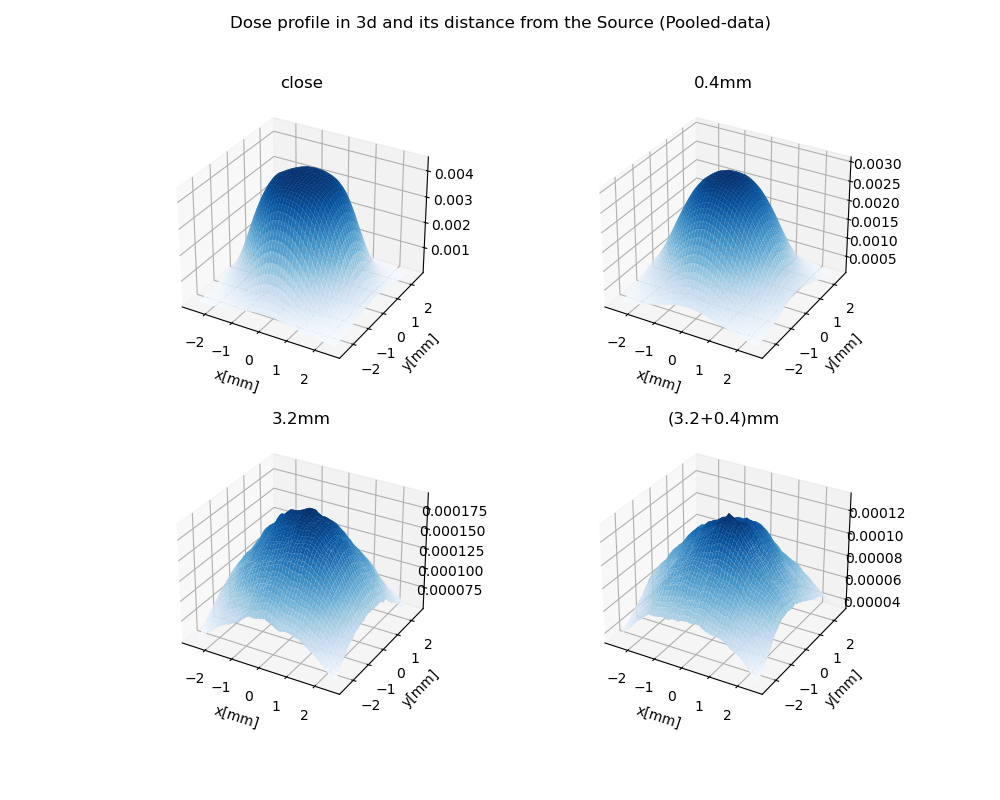

In [11]:
fig, axs = plt.subplots(2, 2,figsize=(10,8),subplot_kw=dict(projection='3d'))
x= np.linspace(-2.5,2.5,47)
xx,yy=np.meshgrid(x,x)
fig.suptitle('Dose profile in 3d and its distance from the Source (Pooled-data)')
axs[0, 0].plot_surface(xx, yy, ll[:,:,0] ,rstride=1, cstride=1, cmap=cm.Blues)
axs[0, 0].set_title('close')

axs[0, 1].plot_surface(xx, yy, ll[:,:,16] ,rstride=1, cstride=1, cmap=cm.Blues)
axs[0, 1].set_title('0.4mm')

axs[1, 0].plot_surface(xx, yy, ll[:,:,128] ,rstride=1, cstride=1, cmap=cm.Blues)
axs[1, 0].set_title('3.2mm')

axs[1, 1].plot_surface(xx, yy, ll[:,:,128+16] ,rstride=1, cstride=1, cmap=cm.Blues)
axs[1, 1].set_title('(3.2+0.4)mm')

for ax in axs.flat:
    ax.set(xlabel='x[mm]', ylabel='y[mm]')


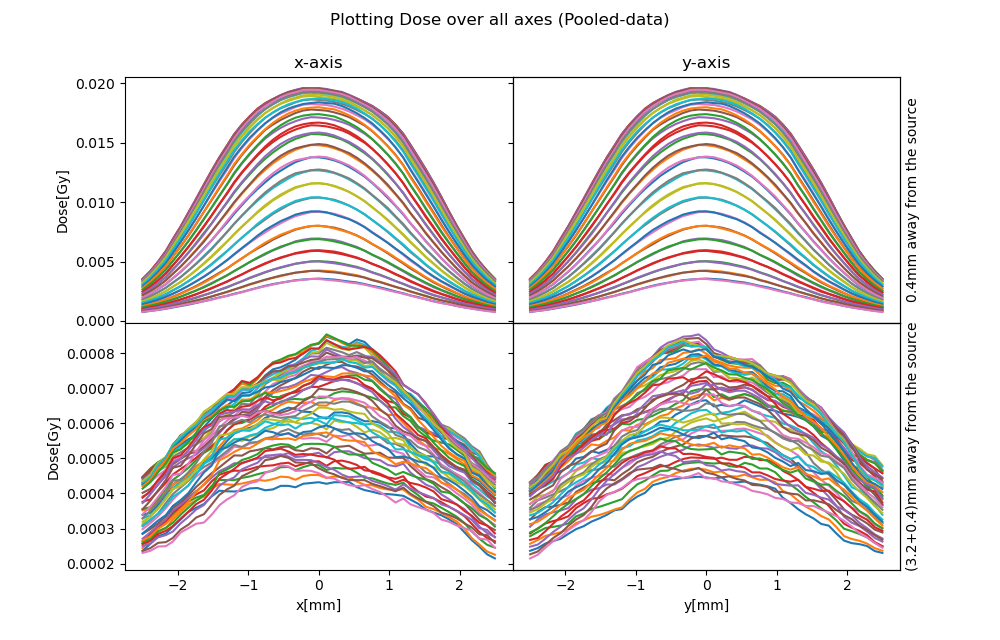

In [12]:
fig = plt.figure(figsize=(10,6.4))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Plotting Dose over all axes (Pooled-data)')

df_cm = pd.DataFrame(ll[:,:,16]*40000000*1.60218e-7, index = np.linspace(-2.5,2.5,47),
                  columns = np.linspace(-2.5,2.5,47))
df_cm.columns=df_cm.columns.map(lambda x: round(x, 2))
df_cm.index=df_cm.index.map(lambda x: round(x, 2))
for row in df_cm.index:
    sns.lineplot(data=df_cm.loc[row], ax=ax1)
for row in df_cm.columns:
    sns.lineplot(data=df_cm.loc[row], ax=ax2)

df_cm = pd.DataFrame(ll[:,:,16+128]*40000000*1.60218e-7, index = np.linspace(-2.5,2.5,47),
                  columns = np.linspace(-2.5,2.5,47))
df_cm.columns=df_cm.columns.map(lambda x: round(x, 2))
for row in df_cm.index:
    sns.lineplot(data=df_cm.loc[row], ax=ax3)
for col in df_cm.columns:
    sns.lineplot(data=df_cm.loc[:,col], ax=ax4)
ax1.set(ylabel='Dose[Gy]')
ax3.set(xlabel='x[mm]',ylabel='Dose[Gy]')
ax4.set(xlabel='y[mm]')
for ax in fig.get_axes():
    ax.label_outer()
axes2 = ax2.twinx()
axes2.set_yticks([])
axes2.set_ylabel('0.4mm away from the source')
axes3 = ax4.twinx()
axes3.set_yticks([])
axes3.set_ylabel('(3.2+0.4)mm away from the source')
ax1.set_title('x-axis')
ax2.set_title('y-axis')
plt.show()

In [13]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return (idx,array[idx])


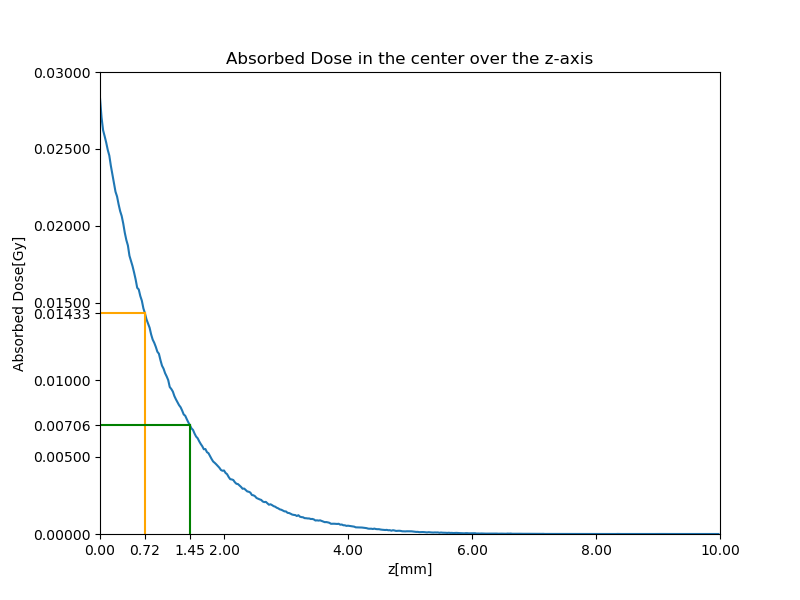

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
xx=np.linspace(0,2-0.0025,800)
ph=(xx[(find_nearest(ll[23,23,0:400],np.max(ll[23,23,:400])/2)[0])]*10,find_nearest(ll[23,23,0:400],np.max(ll[23,23,0:400])/2)[1]*40000000*1.60218e-7)
pq=(xx[(find_nearest(ll[23,23,0:400],np.max(ll[23,23,:400])/4)[0])]*10,find_nearest(ll[23,23,0:400],np.max(ll[23,23,0:400])/4)[1]*40000000*1.60218e-7)

plt.plot(xx[0:400]*10,ll[23,23,:400]*40000000*1.60218e-7)

plt.plot([ph[0],ph[0]],[0,ph[1]],c='orange')
plt.plot([0,ph[0]],[ph[1],ph[1]],c='orange')
plt.plot([pq[0],pq[0]],[0,pq[1]],c='green')
plt.plot([0,pq[0]],[pq[1],pq[1]],c='green')

plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose in the center over the z-axis')
plt.xlim(0,10)
plt.ylim(0,None)
xt = ax.get_xticks() 
xt=np.append(xt,ph[0])
xt=np.append(xt,pq[0])
ax.set_xticks(xt)

xt = ax.get_yticks() 
xt=np.append(xt,ph[1])
xt=np.append(xt,pq[1])
ax.set_yticks(xt)
plt.show()

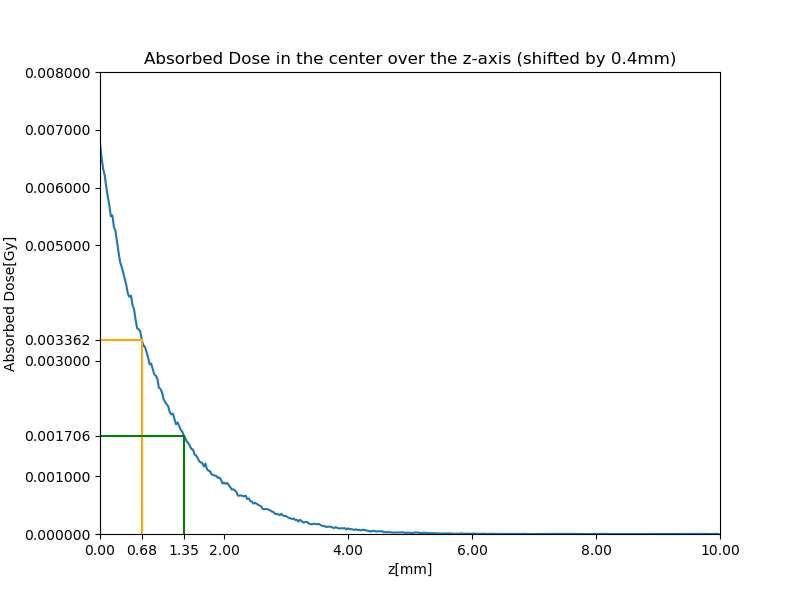

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
xx=np.linspace(0,2-0.0025,800)
ph=(xx[(find_nearest(ll[23,23,60:460],np.max(ll[23,23,60:460])/2)[0])]*10,find_nearest(ll[23,23,60:460],np.max(ll[23,23,60:460])/2)[1]*40000000*1.60218e-7)
pq=(xx[(find_nearest(ll[23,23,60:460],np.max(ll[23,23,60:460])/4)[0])]*10,find_nearest(ll[23,23,60:460],np.max(ll[23,23,60:460])/4)[1]*40000000*1.60218e-7)

plt.plot(xx[0:400]*10,ll[23,23,60:460]*40000000*1.60218e-7)

plt.plot([ph[0],ph[0]],[0,ph[1]],c='orange')
plt.plot([0,ph[0]],[ph[1],ph[1]],c='orange')
plt.plot([pq[0],pq[0]],[0,pq[1]],c='green')
plt.plot([0,pq[0]],[pq[1],pq[1]],c='green')

plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose in the center over the z-axis (shifted by 0.4mm)')
plt.xlim(0,10)
plt.ylim(0,None)
xt = ax.get_xticks() 
xt=np.append(xt,ph[0])
xt=np.append(xt,pq[0])

ax.set_xticks(xt)

xt = ax.get_yticks()
#
xt=np.delete(xt,[2,4])
#
xt=np.append(xt,ph[1])
xt=np.append(xt,pq[1])
ax.set_yticks(xt)
plt.show()

In [16]:
20/800

0.025

In [17]:
1.5/0.025

60.0